<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Шаг-1.-Загрузим-данные-и-подготовим-их-к-анализу" data-toc-modified-id="Шаг-1.-Загрузим-данные-и-подготовим-их-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Загрузим данные и подготовим их к анализу</a></span></li><li><span><a href="#Шаг-2.-Приоритизация-гипотез" data-toc-modified-id="Шаг-2.-Приоритизация-гипотез-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Приоритизация гипотез</a></span></li><li><span><a href="#Шаг-3.-Анализ-A/B-теста" data-toc-modified-id="Шаг-3.-Анализ-A/B-теста-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 3. Анализ A/B-теста</a></span></li><li><span><a href="#Шаг-4.-Выводы" data-toc-modified-id="Шаг-4.-Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 4. Выводы</a></span></li></ul></div>

# Принятие решений в бизнесе

### Описание проекта

Для крупного интернет-магазина совместно с отделом маркетинга составлен список гипотез для увеличения выручки. А также проведен A/B-тест и полученные результаты описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

**Цели Исследования**:
- Приоритизировать гипотезы;
- запустить A/B-тест и проанализировать его результаты;
- принять решение по результатам теста.

### Описание данных

Файл /datasets/hypothesis.csv 

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл /datasets/orders.csv

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста


## Шаг 1. Загрузим данные и подготовим их к анализу

In [1]:
# импорт библиотек
import pandas as pd
pd.set_option('display.max_colwidth', 130) # сброс ограничений на количество символов в записи
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()
import scipy.stats as stats

In [2]:
hypothesis = pd.read_csv('C:/Users/fima3/Documents/Практикум Аналитик/Модуль 2/Спринт 7 АВ тесты/Проект/hypothesis.csv')
orders = pd.read_csv('C:/Users/fima3/Documents/Практикум Аналитик/Модуль 2/Спринт 7 АВ тесты/Проект/orders.csv')
visitors = pd.read_csv('C:/Users/fima3/Documents/Практикум Аналитик/Модуль 2/Спринт 7 АВ тесты/Проект/visitors.csv')

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [6]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
orders.duplicated().sum()

0

In [8]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

In [9]:
orders.dtypes

transactionId             int64
visitorId                 int64
date             datetime64[ns]
revenue                   int64
group                    object
dtype: object

In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
visitors['date'] = pd.to_datetime(visitors['date'],  format='%Y-%m-%d')

In [13]:
visitors.duplicated().sum()

0

Проверим, есть ли такие пользователи, которые попадают в обе группы теста.

In [14]:
orders_visitors_A = orders[orders['group'] == 'A']['visitorId'].drop_duplicates()

orders_visitors_B = orders[orders['group'] == 'B']['visitorId'].drop_duplicates()

visitors_both_groups = set(orders_visitors_A).intersection(orders_visitors_B)

visitors_both_groups

{8300375,
 199603092,
 232979603,
 237748145,
 276558944,
 351125977,
 393266494,
 457167155,
 471551937,
 477780734,
 818047933,
 963407295,
 1230306981,
 1294878855,
 1316129916,
 1333886533,
 1404934699,
 1602967004,
 1614305549,
 1648269707,
 1668030113,
 1738359350,
 1801183820,
 1959144690,
 2038680547,
 2044997962,
 2378935119,
 2458001652,
 2579882178,
 2587333274,
 2600415354,
 2654030115,
 2686716486,
 2712142231,
 2716752286,
 2780786433,
 2927087541,
 2949041841,
 2954449915,
 3062433592,
 3202540741,
 3234906277,
 3656415546,
 3717692402,
 3766097110,
 3803269165,
 3891541246,
 3941795274,
 3951559397,
 3957174400,
 3963646447,
 3972127743,
 3984495233,
 4069496402,
 4120364173,
 4186807279,
 4256040402,
 4266935830}

Действительно, в покупках есть пересечение, но в посещениях (visitors) данные агрегированы. Полностью и точно удалить данные таких пользователей мы не сможем. Поэтому рекомендуется не удалять таких пользователей.

Загрузили файлы, посмотрели общую информацию, поменяли типы данных там, где это было необходимо, проверили данные на пропуски и  на дубликаты.

## Шаг 2. Приоритизация гипотез

Применим фреймворк ICE для приоритизации гипотез. 

In [15]:
hypothesis['ICE'] = round(hypothesis['Impact']*hypothesis['Confidence'] / hypothesis['Efforts'], 1)

In [16]:
hypothesis.sort_values(by='ICE', ascending=False) # отсортируем гипотезы по убыванию приоритета

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


Вперед вышли 8, 0 и 7 гипотезы.

Применим фреймворк RICE для приоритизации гипотез.

In [17]:
hypothesis['RICE'] = hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'] / hypothesis['Efforts']

In [18]:
hypothesis.sort_values(by='RICE', ascending=False)# отсортируем гипотезы по убыванию приоритета

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


После применения RICE лидировать стала 7 гипотеза, а за ней идут 2 и 0, а 8 гипотеза занимает только 5 место. Это связано с тем, что у 7 гипотезы очень высокий показатель охвата Reach, который и повлиял на общий RICE, а вот у 8 гипотезы наоборот очень низкий параметр Reach, поэтому она опустилась ниже.

Вывод: после применения фреймворка ICE лидировала 8 гипотеза, но после применения RICE лидером стала 7 гипотеза, так как у нее выше параметр Reach, т.е. она затронет больше пользователей.

## Шаг 3. Анализ A/B-теста

Проанализируем A/B-тест:

1.	Построим график кумулятивной выручки по группам. 

In [19]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates() 

In [20]:
# получаем агрегированные кумулятивные по дням данные о заказах 
orders_agg = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_agg = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам названия
cumulative_data = orders_agg.merge(visitors_agg, on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulative_data.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


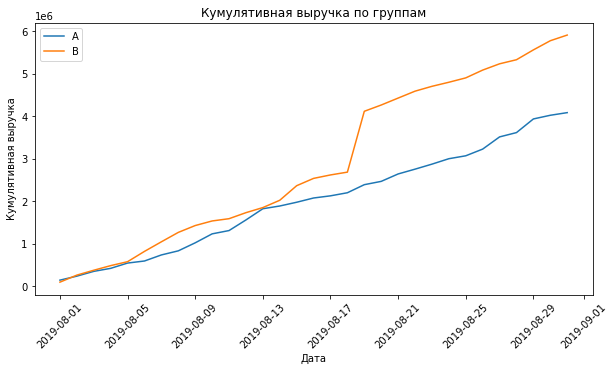

In [21]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_A = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_B = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

# задаём размер сетки для графиков
plt.figure(figsize=(10, 5))

# строим график выручки группы А
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')

# строим график выручки группы B
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')

plt.legend() 

plt.title('Кумулятивная выручка по группам')

plt.xlabel('Дата')

plt.ylabel('Кумулятивная выручка')

plt.xticks(rotation=45);

Выручка равномерно растет в течение всего теста, и это положительный результат. Однако на графиках есть резкие скачки, что может свидетельствовать о крупных заказах или большом количестве заказов, которые необходимо будет проверить.

2.	Построим график кумулятивного среднего чека по группам. 

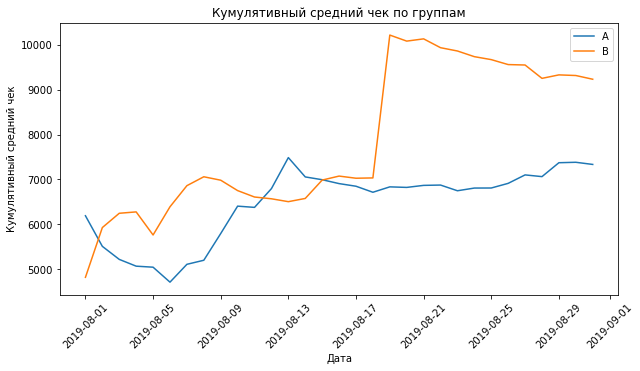

In [22]:
# задаём размер сетки для графиков
plt.figure(figsize=(10, 5))

# Строим график  кумулятивного среднего чека группы А
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='A')

# Строим график  кумулятивного среднего чека группы В
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='B')

plt.legend() 

plt.title('Кумулятивный средний чек по группам')

plt.xlabel('Дата')

plt.ylabel('Кумулятивный средний чек')

plt.xticks(rotation=45);

На графиках кумулятивного среднего чека много колебаний. В группе A ближе к концу теста средний чек стабилизируется, а вот в группе В произошел резкий всплеск и средний чек падает после резкого скачка, видимо были аномально большие заказы и теперь необходимо еще время, чтобы он стал равномерным.

3.	Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

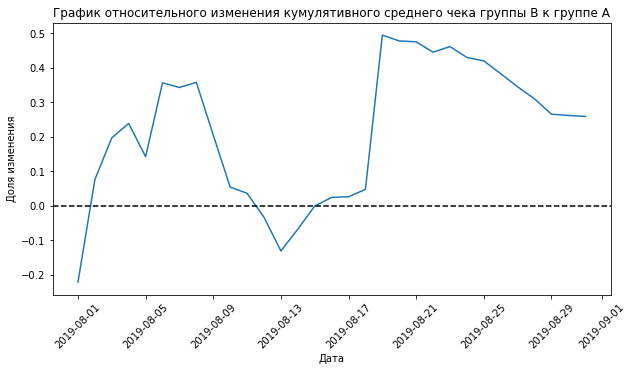

In [23]:
# объединяем два датафрейма с кумулятивными выручками по группам
merged_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, on='date', suffixes=['A', 'B'])

# задаём размер сетки для графиков
plt.figure(figsize=(10, 5))

# cтроим график относительного изменения кумулятивного среднего чека группы B к группе A
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')

plt.xlabel('Дата')

plt.ylabel('Доля изменения')

plt.xticks(rotation=45);

В нескольких точках график различия между группами резко «скачет». На это скорей всего повлияли выбросы (крупные заказы), которые необходимо будет проверить. Средний чек сегмента В выше, чем у сегмента А.

4.	Построим график кумулятивной конверсии по группам. 

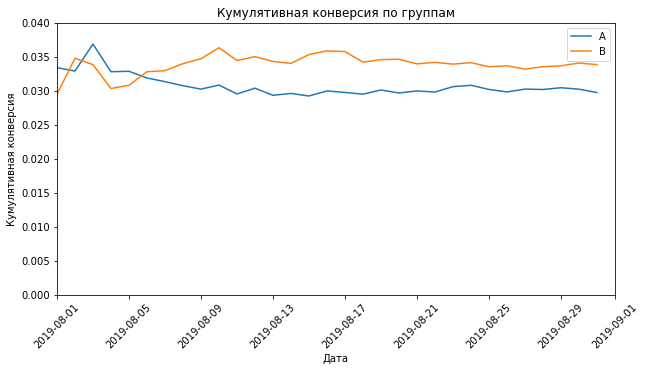

In [24]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# фильтруем по группе A
cumulative_data_A = cumulative_data[cumulative_data['group']=='A']

# фильтруем по группе B
cumulative_data_B = cumulative_data[cumulative_data['group']=='B']

# задаём размер сетки для графиков
plt.figure(figsize=(10, 5))

# строим графики
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')

plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(['2019-08-01', '2019-09-01', 0, 0.040])

plt.title('Кумулятивная конверсия по группам')

plt.xlabel('Дата')

plt.ylabel('Кумулятивная конверсия')

plt.xticks(rotation=45);

На графике отметим, что конверсия группы В сначала отставала от конверсии группы А, но затем вырвалась вперед и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

5.	Построим график относительного изменения кумулятивной конверсии группы B к группе A. 

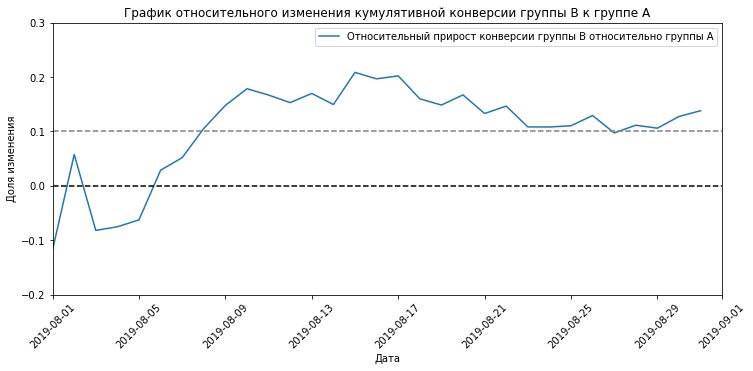

In [25]:
# объединяем два датафрейма с кумулятивными конверсиями по группам
merged_cumulative_conversions = cumulative_data_A[['date','conversion']].merge(cumulative_data_B[['date','conversion']], on='date', suffixes=['A', 'B'])

# задаём размер сетки для графиков
plt.figure(figsize=(12, 5))

# cтроим график относительного изменения кумулятивной конверсии группы B к группе A
plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.legend()

# добавляем оси X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-09-01', -0.2, 0.3])

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')

plt.xlabel('Дата')

plt.ylabel('Доля изменения')

plt.xticks(rotation=45);

По графикам мы видим, что конверсия в группе B в начале теста догоняла конверсию группы А, потом было падение, а затем она начинает расти и постепенно выравнивается на приросте около 10%. После 8-го дня конверсия уже стабилизировалась.

6.	Построим точечный график количества заказов по пользователям.

In [26]:
orders_by_users = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})

orders_by_users.columns = ['visitorId', 'orders']

orders_by_users.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Text(0, 0.5, 'Количество заказов')

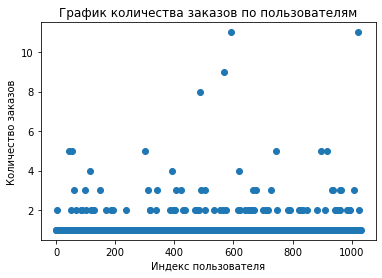

In [27]:
x_values = pd.Series(range(0,len(orders_by_users)))

plt.scatter(x_values, orders_by_users['orders']) 

plt.title('График количества заказов по пользователям')

plt.xlabel('Индекс пользователя')

plt.ylabel('Количество заказов')

По точечной диаграмме можно сказать, что много пользователей сделали 1 заказ, а вот 2 и больше заказов не так много.

7.	Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [28]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли больше, чем 2 заказа, и 1% - больше 4 заказов. Выберем границу для отсеивания аномальных пользователей - 3 заказа на пользователя.

8.	Построим точечный график стоимостей заказов.

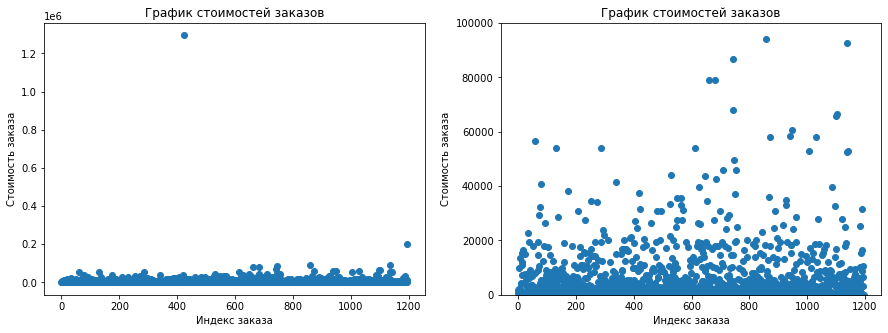

In [29]:
x_values = pd.Series(range(0,len(orders['revenue'])))

fig, axes= plt.subplots(1, 2,figsize=(15,5))

axes[0].scatter(x_values, orders['revenue']) 

axes[0].set_title('График стоимостей заказов')

axes[0].set_xlabel('Индекс заказа')

axes[0].set_ylabel('Стоимость заказа')

axes[1].set_ylim([0, 100000])

axes[1].scatter(x_values, orders['revenue'])

axes[1].set_title('График стоимостей заказов')

axes[1].set_xlabel('Индекс заказа')

axes[1].set_ylabel('Стоимость заказа')

plt.show()

Большинство пользователей совершали заказы до 50 000 руб., но есть и единичные крупные заказы.

9.	Посчитаем 95-й и 99-й перцентили стоимости заказов. 

In [30]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% заказов дороже 28 000 руб., не более 1% дороже 58 233 руб. Примем за аномальных пользователей тех, кто совершил заказы дороже 40 000 руб. Так мы отсеем от 1-5% пользователей с крупными заказами и 1-5% пользователей, которые совершили от 3 заказов.

10.	Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. 

Нулевая гипотеза: различий в конверсии между группами нет. Альтернативная гипотеза: различия в конверсии между группами есть. Чтобы рассчитать статистическую значимость различий в конверсии, передадим критерию mannwhitneyu() данные о заказах, учитывая также пользователей, которые не сделали ни одного заказа. И найдём относительные различия в конверсии между группами:

In [31]:
orders_by_users_A = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})

orders_by_users_A.columns = ['userId', 'orders']

orders_by_users_B = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})

orders_by_users_B.columns = ['userId', 'orders']

In [32]:
visitors_daily_A = visitors[visitors['group'] == 'A'][['date', 'visitors']]

visitors_daily_A.columns = ['date', 'visitors_per_date_A']

visitors_daily_B = visitors[visitors['group'] == 'B'][['date', 'visitors']]

visitors_daily_B.columns = ['date', 'visitors_per_date_B']

In [33]:
sample_A = pd.concat([orders_by_users_A['orders'],
                     pd.Series(0, index=np.arange(visitors_daily_A['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])), name='orders')],
                     axis=0)

sample_B = pd.concat([orders_by_users_B['orders'],
                     pd.Series(0, index=np.arange(visitors_daily_B['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])), name='orders')],
                     axis=0)

alpha = 0.05

AB_pvalue = stats.mannwhitneyu(sample_A, sample_B)[1]

print("P-value = {0:.3f}".format(AB_pvalue))

print("Относительное различие в конверсии между группами = {0:.3f}".format(sample_B.mean() / sample_A.mean() - 1))

if AB_pvalue < alpha:
    print('Отвергаем нулевую гипотезу для сравнения групп А и B')
else:
    print('Не получилось отвергнуть нулевую гипотезу для сравнения групп А и B') 

P-value = 0.017
Относительное различие в конверсии между группами = 0.138
Отвергаем нулевую гипотезу для сравнения групп А и B


Вывод: По «сырым» данным конверсии групп A и B различаются.
P-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный прирост конверсии группы B равен 13.8%.

11.	Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.
Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.
А ещё найдём относительные различия в среднем чеке между группами:

In [34]:
AB_pvalue = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

print("P-value = {0:.3f}".format(AB_pvalue))

print("Относительное различие в среднем чеке между группами = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

if AB_pvalue < alpha:
    print('Отвергаем нулевую гипотезу для сравнения групп А и B')
else:
    print('Не получилось отвергнуть нулевую гипотезу для сравнения групп А и B') 

P-value = 0.729
Относительное различие в среднем чеке между группами = 0.259
Не получилось отвергнуть нулевую гипотезу для сравнения групп А и B


P-value значительно больше 0.05. Значит нулевую гипотезу не отвергаем и считаем, что в среднем чеке сегментов нет различий. Однако по относительным различиям средний чек группы B выше среднего чека группы A почти на 26%. Скорее всего это связано с аномально крупными значениями заказов. Отфильтруем эти значения в следующих шагах и проверим, как изменится показатель относительной разницы в среднем чеке.

12.	Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. 

Для этого найдем пользователей, совершивших более 3 заказов, а также пользователей, стоимость одного заказа которых больше 40 000 руб.

In [35]:
users_many_orders = pd.concat([orders_by_users_A[orders_by_users_A['orders'] > 2]['userId'],
                               orders_by_users_B[orders_by_users_B['orders'] > 2]['userId']],
                               axis=0)

users_expensive_orders = orders[orders['revenue'] > 40000]['visitorId']

abnormal_users = (pd.concat([users_many_orders, users_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values())

print(abnormal_users.head(5))

print(abnormal_users.shape[0])

1099    148427295
18      199603092
23      237748145
37      249864742
684     358944393
dtype: int64
45


Получилось 45 аномальных пользователей.
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [36]:
sample_A_filtered = pd.concat([orders_by_users_A[np.logical_not(orders_by_users_A['userId'].isin(abnormal_users))]['orders'],
        pd.Series(0, index=np.arange(visitors_daily_A['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])),
        name='orders')], 
        axis=0)

sample_B_filtered = pd.concat([orders_by_users_B[np.logical_not(orders_by_users_B['userId'].isin(abnormal_users))]['orders'],
        pd.Series(0, index=np.arange(visitors_daily_B['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])),
        name='orders')], 
        axis=0)

In [37]:
# применим статистический критерий Манна-Уитни к полученным выборкам

AB_pvalue = stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]

print("P-value = {0:.3f}".format(AB_pvalue))

print("Относительное различие в конверсии между группами = {0:.3f}".format(sample_B_filtered.mean()/sample_A_filtered.mean()-1))

if AB_pvalue < alpha:
    print('Отвергаем нулевую гипотезу для сравнения групп А и B')
else:
    print('Не получилось отвергнуть нулевую гипотезу для сравнения групп А и B') 

P-value = 0.007
Относительное различие в конверсии между группами = 0.188
Отвергаем нулевую гипотезу для сравнения групп А и B


По «очищенным» данным конверсии групп A и B различаются как и в случае с "сырыми" данными. p-value = 0.007 значительно меньше 0.05. Статистическая значимость достигнута. Сегмент В лучше по конверсии, чем сегмент А. Относительный прирост конверсии группы B равен 18.8%.

13.	Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [38]:
AB_pvalue = stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
                                                 np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'],
                                          orders[np.logical_and(orders['group'] == 'B', 
                                                 np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'])[1]

print("P-value = {0:.3f}".format(AB_pvalue))

print("Относительное различие в среднем чеке между группами = {0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',
                              np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'].mean()
                    / orders[np.logical_and(orders['group'] == 'A',
                             np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'].mean()
                    - 1))

if AB_pvalue < alpha:
    print('Отвергаем нулевую гипотезу для сравнения групп А и B')
else:
    print('Не получилось отвергнуть нулевую гипотезу для сравнения групп А и B')

P-value = 0.944
Относительное различие в среднем чеке между группами = 0.058
Не получилось отвергнуть нулевую гипотезу для сравнения групп А и B


P-value значительно больше 0.05. Значит нулевую гипотезу не отвергаем и считаем, что в среднем чеке нет различий. Средний чек группы B выше среднего чека группы A всего на 5.8 %, по сравнению с "сырыми" данными разница сократилась на 21%, вот какое влияние оказывали аномально крупные заказы.

Выводы:

- Есть статистически значимое различие по конверсии между группами как по "сырым" данным, так и после фильтрации аномалий. Конверсия сегмента В превышает конверсию сегмента А на 18.8 % по "очищенным" данным.

- Нет статистически значимого различия по среднему чеку между группами ни по "сырым", ни по данным после фильтрации аномалий. Относительная разница в среднем чеке группы В от группы А составляет 5.8 %.


## Шаг 4. Выводы

Выводы:
Проведя анализ результатов А/В тестирования, приходим к следующим заключениям:

Есть статистически значимое различие по конверсии между группами как по "сырым" данным, так и после фильтрации аномалий. Причем конверсия группы В выше на 18.8 % по сравнению с группой А.

Нет статистически значимого различия по среднему чеку между группами ни по "сырым", ни по данным после фильтрации аномалий. Различие между группами в 5.8 % не является статистически значимым.

График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения (прирост около 10%).

График различия среднего чека колеблется:  он свидетельствует о наличии аномалий. Сделать из этого графика определённые выводы нельзя.

Исходя из этих результатов, предполагаем, что следует остановить тест, признать победу группы B, так как конверсия в этой группе увеличилась при практически таком же среднем чеке, как и у группы А.